# Linear Model

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [51]:
filepath = "../../../data/processed/df_filtered_5years.xlsx"
df = pd.read_excel(filepath)
df['log_income'] = np.log(df['income'])
df = df.dropna()
df.head()

,island,year,island_id,region_code,region_name,prefecture_code,prefecture_code.1,population,dummy_island_has_bridge,dummy_island_is_connected_mainland,year_bridge_opened,dummy_after_bridge_opened,year_connect_mainland,dummy_after_connect_mainland,income,log_income
2,島後,2005,0,32528,隠岐の島町,32,島根県,17259.0,0,0,0,0,0,0,19083931.0,16.764357
3,島後,2010,0,32528,隠岐の島町,32,島根県,15930.0,0,0,0,0,0,0,16082881.0,16.593266
4,島後,2015,0,32528,隠岐の島町,32,島根県,14901.0,0,0,0,0,0,0,16135317.0,16.596521
5,島後,2020,0,32528,隠岐の島町,32,島根県,13882.0,0,0,0,0,0,0,17473739.0,16.676210
6,中ノ島,1985,1,32525,海士町,32,島根県,3339.0,0,0,0,0,0,0,2645758.0,14.788468


## PooledOLS

In [52]:
formual = 'population ~ dummy_after_bridge_opened + log_income'

model = smf.ols(formula=formual, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             population   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     56.62
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           2.82e-23
Time:                        13:07:46   Log-Likelihood:                -6118.5
No. Observations:                 611   AIC:                         1.224e+04
Df Residuals:                     608   BIC:                         1.226e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## Two Way Fixed Effects

In [53]:
formula = 'population ~ dummy_after_bridge_opened + log_income + C(island_id) + C(year)'

model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             population   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     119.1
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          5.09e-295
Time:                        13:07:49   Log-Likelihood:                -5014.1
No. Observations:                 611   AIC:                         1.035e+04
Df Residuals:                     448   BIC:                         1.107e+04
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## 残差分析

In [54]:
residuals = results.resid

In [55]:
# 説明変数と残差の相関
corr_log_income = np.corrcoef(df['log_income'], residuals)[0, 1]
corr_bridge = np.corrcoef(df['dummy_after_bridge_opened'], residuals)[0, 1]
coor_population = np.corrcoef(df['population'], residuals)[0, 1]

print(f'coor between log_income and residuals: {corr_log_income:.3f}')
print(f'coor between bridge and residuals: {corr_bridge:.3f}')
print(f'coor between population and residuals: {coor_population:.3f}')

coor between log_income and residuals: 0.000
coor between bridge and residuals: 0.000
coor between population and residuals: 0.151


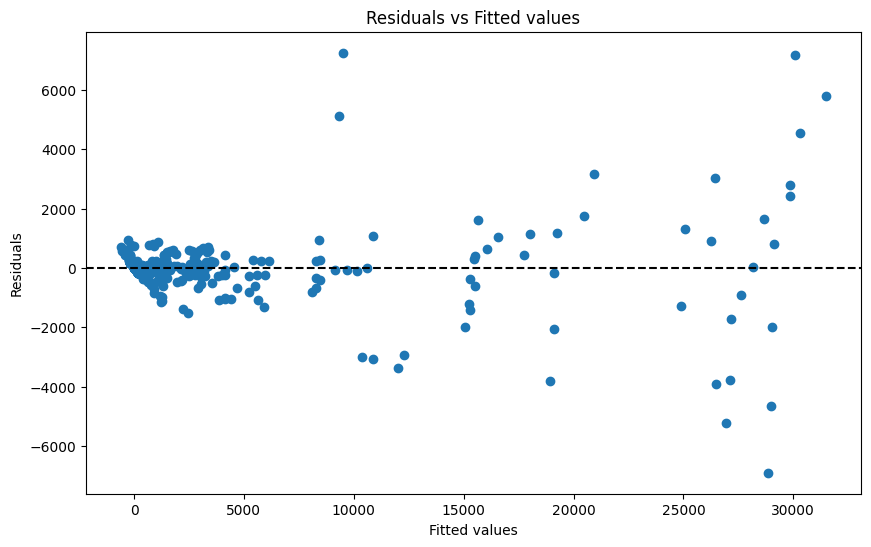

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(results.fittedvalues, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

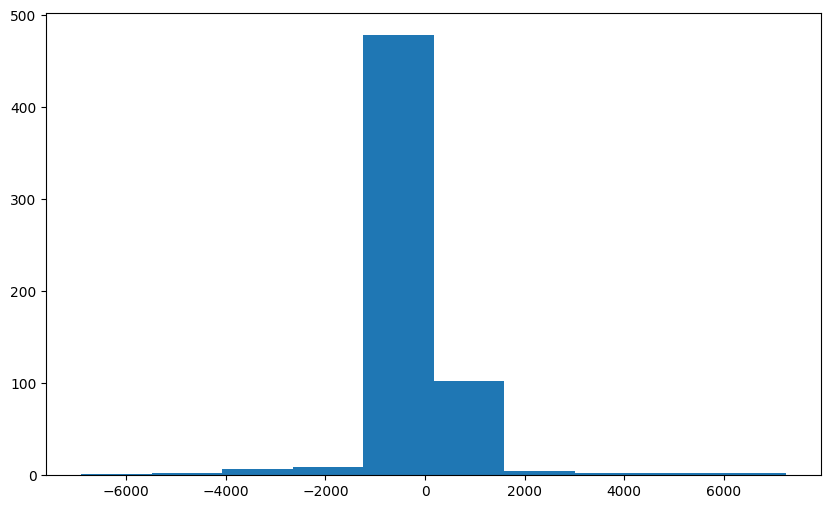

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(residuals)
plt.show()